
#____________________________________ DATA CLEANING ____________________________________#

Training Set (X_train) after imputing median and standardizing: 
            0         1         2         3         4         5         6  \
0    0.674968  0.045111 -0.514031 -0.984920 -0.053158 -1.012099  1.032719   
1    0.674968 -0.405614 -0.916578 -0.526706 -0.177862 -0.602972 -0.144016   
2    0.674688 -0.442854 -0.370513 -0.388288 -0.399963  0.133177 -0.359335   
3    0.674968 -0.224673 -0.711895 -1.027877 -0.380030 -0.794553  0.523565   
4   -2.134770 -0.658851  1.027419  1.110451 -0.540931  0.927572 -0.904065   
..        ...       ...       ...       ...       ...       ...       ...   
115  0.674968  0.300487 -0.554993 -0.836955  0.234043 -0.864729  1.354981   
116 -1.748477 -0.643628  1.670670  1.563891 -0.533171  1.397752 -0.911643   
117  0.565698 -0.399761 -0.250030 -0.168727 -0.376227 -0.330688 -0.521223   
118  0.601021 -0.099387 -1.079654 -0.784451 -0.225107 -1.026134  0.408961

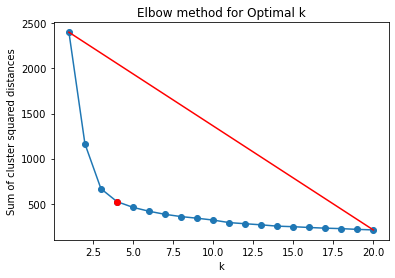

Linear (red) line (ax + by + c = 0): a = -115.226, b = -1.000, c = 2515.226
Distance from elbow point to line: 1327.995

-> The optimal k value for k-means clustering is: 4

___________

Cluster Labels (fclusterlabel) using k-Means Clustering (k=4) for the Training set: 
     fclusterlabel
0                3
1                3
2                1
3                3
4                0
..             ...
115              3
116              0
117              1
118              3
119              0

[120 rows x 1 columns]
___________

Cluster Labels (fclusterlabel) using k-Means Clustering (k=4) for the Test set: 
    fclusterlabel
0               1
1               3
2               1
3               0
4               1
..            ...
58              3
59              3
60              0
61              2
62              0

[63 rows x 1 columns]

___________ INTERACTION TERM PAIRS ___________

Interaction Term Pairs for Training set:
         f0,1      f0,2      f0,3      f0,4      f0,5

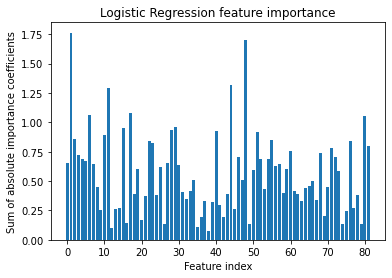

The mean importance score is: 0.571
The median importance score is: 0.512
___________

Using SelectFromModel to pick the most important features...
The cut off importance threshold being used by SelectFromModel is: 0.571
Dropping features below importance threshold (< 0.571)... 

___________

Features remaining after dropping: (40)
Index([              0,               3,               5,               6,
                     7,               9,              10,              11,
                    15,              16,          'f0,7',         'f0,10',
               'f0,15',          'f2,5',          'f2,6',         'f2,14',
               'f2,19',          'f3,6',          'f3,7',          'f3,8',
               'f5,10',         'f5,16',          'f6,7',         'f6,13',
               'f6,16',         'f6,19',          'f7,9',         'f7,11',
               'f7,13',         'f7,14',         'f7,15',         'f7,17',
               'f7,19',        'f10,19',        'f12,19',        '

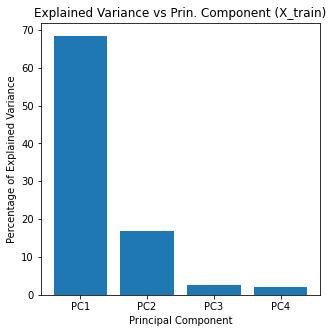

___________

Plotting PCA scatter graph of PC2 against PC1 from Training Set: (see 'task2bgraph4.png')


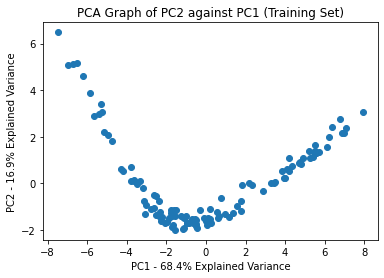

___________

Performing 3-nn classification on 4 PCA produced features...
Accuracy of PCA reduction: 76.190%




#____________________________________ RESULTS ____________________________________#

Accuracy of feature engineering: 76.190%
Accuracy of PCA: 76.190%
Accuracy of first four features: 66.667%

___________________________________________________________________________________


The end. Have a nice day!





In [1]:
import csv
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif




### PLEASE ALLOW UP TO 40 SECONDS FOR THIS SCRIPT TO RUN.




## NOTE: this script contains fragments of code following examples provided in the sklearn documentation.
# Tasks related to the following libraries have been influenced:
# - PCA
# - SelectFromModel
# - LogisticRegression
# - SelectKBest
# - chi2
# - mutual_info_classif
# - f_classif

# This blog post also played a significant role in the building of this model:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/




RANDOM_STATE = 200



print('\n#____________________________________ DATA CLEANING ____________________________________#\n')

##load in the data
world=pd.read_csv('data/world.csv',encoding = 'ISO-8859-1')
life=pd.read_csv('data/life.csv',encoding = 'ISO-8859-1')
world = world.drop(columns=['Country Name', 'Time'])
world = life.merge(world, on='Country Code').drop(columns=['Year'])
world.sort_values(by='Country')
world.replace('..', float('NaN'), inplace = True)

# get the required data
data = world.drop(columns=['Country', 'Country Code', 'Life expectancy at birth (years)']).astype(float)
# get the class labels
classlabel = world['Life expectancy at birth (years)']



# randomly select 70% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.66, test_size=0.34, random_state=RANDOM_STATE)


pd.set_option('mode.chained_assignment', None)
# impute data with median value
for column in data.columns:
    median = X_train[column].median()
    X_train[column].replace(float('NaN'), median, inplace=True)
    X_test[column].replace(float('NaN'), median, inplace=True)

# Standardize the data to have 0 mean and unit variance.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# transform data set back into a DataFrame
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


print("Training Set (X_train) after imputing median and standardizing: ")
print(X_train)
print('___________\n')
print("Test Set (X_test) after imputing median and standardizing: ")
print(X_test)






print('\n\n\n')
print('\n#____________________________________ FEATURE ENGINEERING ____________________________________#\n')

print('\n___________ K MEANS CLUSTERING ___________\n')

### Finding optimal k value for clustering using elbow method
k_test_range = 20
print("Testing sum of cluster squared distances for k from 1 to "+str(k_test_range)+"... ")

# Calculate the sum of squared distances inside clusters for k values from 1 to 20
inertias = []
k_values = range(1,k_test_range+1)
for k in k_values:
    KMeans_model = KMeans(n_clusters = k, random_state=RANDOM_STATE)
    clusters = KMeans_model.fit(X_train)
    inertias.append(clusters.inertia_)

# Find the linear line connecting the lowest and highest k values (see graph task2bgraph1.png)
y1 = inertias[0]
x1 = k_values[0]
y2 = inertias[-1]
x2 = k_values[-1]
y = [y1, y2]
x = [x1, x2]

# ax + by + c = 0
b = -1
a = (y2-y1)/(x2-x1)
c = y1 - a*x1


# Find the k value that is furthest away from the linear line, this is the elbow point
max_distance = 0
optimal_k = 0
for i in range(len(k_values)):
    x_current = k_values[i]
    y_current = inertias[i]
    distance = (a*x_current + b*y_current + c)/(math.sqrt(a*a + b*b))
    if distance > max_distance:
        max_distance = distance
        optimal_k = x_current
max_distance *= 100

print("Plotting sum of cluster squared distances for each k: (see 'task2bgraph1.png')\n")
# Plot of k values against sum of distances inside clusters for each k value
plt.plot(k_values, inertias, 'o-')
plt.plot(x, y, 'r-')
plt.plot(optimal_k, inertias[optimal_k-1], 'ro')
plt.xlabel('k')
plt.ylabel('Sum of cluster squared distances')
plt.title('Elbow method for Optimal k')
plt.savefig('output/task2bgraph1.png')
plt.show()

print('Linear (red) line (ax + by + c = 0): a = ' + str(round(Decimal(a), 3)) + ', b = ' + 
      str(round(Decimal(b), 3)) + ', c = ' + str(round(Decimal(c), 3)))
print('Distance from elbow point to line: ' + str(round(Decimal(max_distance), 3)))
print('\n-> The optimal k value for k-means clustering is: ' + str(optimal_k) + '\n')

clusters = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE).fit(X_train)
X_train_clusters = clusters.labels_

# Find the nearest clusters for X_test
X_test_clusters = []
for data_point in X_test.values:
    label = 0
    min_dist = np.linalg.norm(data_point - clusters.cluster_centers_[0])
    for i in range(len(clusters.cluster_centers_)):
        centroid = clusters.cluster_centers_[i]
        dist = np.linalg.norm(data_point - centroid)
        if dist < min_dist:
            min_dist = dist
            label = i
    X_test_clusters.append(label)


X_train_clusters = pd.DataFrame({'fclusterlabel': X_train_clusters})
X_test_clusters = pd.DataFrame({'fclusterlabel': X_test_clusters})


print('___________\n')
print("Cluster Labels (fclusterlabel) using k-Means Clustering (k="+str(optimal_k)+") for the Training set: " )
print(X_train_clusters) 
print('___________\n')
print("Cluster Labels (fclusterlabel) using k-Means Clustering (k="+str(optimal_k)+") for the Test set: " )
print(X_test_clusters)




print('\n___________ INTERACTION TERM PAIRS ___________\n')

interaction_terms_train = pd.DataFrame(columns = {})
interaction_terms_test = pd.DataFrame(columns = {})

for i in range(len(X_train.columns)):
    if i+1 != len(X_train.columns):
        for j in range(i+1, len(X_train.columns)):
            feature_name = 'f' + str(i) + ','+ str(j)
            interaction_terms_train[feature_name] = pd.Series(X_train.iloc[:,i] * X_train.iloc[:,j])
            interaction_terms_test[feature_name] = pd.Series(X_test.iloc[:,i] * X_test.iloc[:,j])

print('Interaction Term Pairs for Training set:')
print(interaction_terms_train)
print('___________\n')
print('Interaction Term Pairs for Testing set:')
print(interaction_terms_test)

X_train = X_train.merge(interaction_terms_train, left_on=X_train.index, right_on=interaction_terms_train.index).drop(columns='key_0')
X_test = X_test.merge(interaction_terms_test, left_on=X_test.index, right_on=interaction_terms_test.index).drop(columns='key_0')
X_train = X_train.merge(X_train_clusters, left_on=X_train.index, right_on=X_train_clusters.index).drop(columns='key_0')
X_test = X_test.merge(X_test_clusters, left_on=X_test.index, right_on=X_test_clusters.index).drop(columns='key_0')

X_train_full = X_train.copy()
X_test_full = X_test.copy()


print('\n___________ PRODUCED DATA SET ___________\n')
print("-> Data set now has dimensions: ", end='')
print(X_train_full.shape)
print("-> Data set now has features:")
print(X_train_full.columns)








print('\n\n\n')
print('\n#____________________________________ FEATURE SELECTION ____________________________________#\n')

print('\n___________ CORRELATION ANALYSIS ___________\n')
print('Calculating intercorrelation matrix... ')

corr_matrix = X_train.corr()

# ### UNCOMMENT THIS PART TO SEE INTIAL CORRELATION MATRIX
# print("Initial correlation matrix (before feature removal and re-calculations):")
# print(X_train.corr())
# _____________________



# This function finds the feature that is correlated (> threshold) the most with 
# other features. It counts the number of correlated (> threshold) features for 
# each feature and returns the highest count.
def find_most_corr_column(corr_matrix, threshold):
    max_corr_count = 0
    max_corr_column = ''
    for i in range(len(corr_matrix.values)):
        corr_count = 0
        for j in range(len(corr_matrix.values[i])):
            if i == j:
                continue
            else:
                corr_value = corr_matrix.values[i][j]
                if corr_value > threshold:
                    corr_count += 1
        if corr_count > max_corr_count:
            max_corr_count = corr_count
            max_corr_column = corr_matrix.columns[i]
    return max_corr_column


correlation_threshold = 0.9

print('Setting correlation threshold to ' + str(correlation_threshold))
print('Dropping features with the highest number of inter-correlations (> '+str(correlation_threshold)+') one by one...')
corr_matrix = corr_matrix.abs()
to_drop = []
remove_column = find_most_corr_column(corr_matrix, correlation_threshold)

# While the function find_most_corr_column() still returns a feature, remove that feature 
# and re-calculate correlation matrix.
# This removes the most highly correlated features one by one.
while (remove_column):
    to_drop.append(remove_column)
    X_train.drop(columns={remove_column}, inplace = True)
    corr_matrix = X_train.corr().abs()
    remove_column = find_most_corr_column(corr_matrix, correlation_threshold)

X_test = X_test.drop(columns=to_drop)


print('___________\n')
print('Correlated features dropped: (' + str(len(to_drop)) + ' features)')
print(to_drop)
print('___________\n')
print('Features remaining after dropping: (' + str(len(X_train.columns)) +' features)')
print(X_train.columns)





print('\n___________ LOGISTIC REGRESSION ANALYSIS ___________\n')

print("Calculating Logistic Regression importance scores for each feature...")

# define the LogisticRegression model
LR = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE).fit(X_train, y_train)

# define the LogisticRegression model
importance_LR = abs(LR.coef_[0])
for i in range(1, len(LR.coef_)):
    importance_LR = importance_LR + abs(LR.coef_[i])

importance_LR = pd.Series(importance_LR)


print("Plotting sum of absolute Logistic Regression coefficients: (see 'task2bgraph2.png')")
plt.bar([x for x in range(len(importance_LR.values))], importance_LR.values)
plt.title('Logistic Regression feature importance')
plt.xlabel('Feature index')
plt.ylabel('Sum of absolute importance coefficients')
plt.savefig('output/task2bgraph2.png')
plt.show()


print("The mean importance score is: ", end='')
print(round(Decimal(importance_LR.mean()),3))
print("The median importance score is: ", end='')
print(round(Decimal(importance_LR.median()),3))


print('___________\n')
print('Using SelectFromModel to pick the most important features...')
# Choose by logistic regression
model_SFM_LR = SelectFromModel(estimator=LR).fit(X_train, y_train)
importance_threshold = round(Decimal(model_SFM_LR.threshold_),3)
print('The cut off importance threshold being used by SelectFromModel is: ' + str(importance_threshold))


support = model_SFM_LR.get_support()
features_remaining = [X_train.columns[i] for i in range(len(X_train.columns)) if support[i]]


print('Dropping features below importance threshold (< '+str(importance_threshold)+')... \n')
X_train = model_SFM_LR.transform(X_train)
X_train = pd.DataFrame(X_train, columns=features_remaining)
X_test = model_SFM_LR.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features_remaining)


print('___________\n')
print('Features remaining after dropping: ('+str(len(X_train.columns))+')')
print(X_train.columns)





print('\n___________ SELECT K BEST ___________\n')
print('Using SelectKBest to pick best 4 features with 3 different classification methods: ')
print('ANOVA F (f_classif),  Mutual Information (mutual_info_classif), Chi Square (chi2)\n\n')


# Using ANOVA F
sKb = SelectKBest(f_classif, k=4)
sKb.fit(X_train, y_train)
selected_column_indexes = sKb.get_support(indices=True)
selected_columns_ANOVA = [X_train.columns[i] for i in selected_column_indexes]
X_train_ANOVA = X_train[selected_columns_ANOVA]
X_test_ANOVA = X_test[selected_columns_ANOVA]

print("Features selected by ANOVA F: ", end='')
print(selected_columns_ANOVA)


# Using mutual info (this step is done manually instead of SelectKBest to enforce RANDOM_STATE)
# The n_neighbors number was tested several times and 7 was determined to be the lowest number
# that gives the best results
N_NEIGHBORS_MUTUAL_INFO = 7
mutual_info = mutual_info_classif(X_train, y_train, n_neighbors=N_NEIGHBORS_MUTUAL_INFO, random_state=RANDOM_STATE)
mutual_info = pd.DataFrame({'feature':X_train.columns, 'score': mutual_info})
mutual_info.sort_values(by='score', ascending=False, inplace=True)
top4 = mutual_info.head(4)
selected_columns_MI = [X_train.columns[i] for i in range(len(X_train.columns)) if X_train.columns[i] in top4.feature.values]
X_train_MI = X_train[selected_columns_MI]
X_test_MI = X_test[selected_columns_MI]

print("Features selected by Mutual Information: ", end = '')
print(selected_columns_MI)




# Using Chi Square
# scale X_train in between 0 and 1, scale X_test with the same scaler
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_chi2 = scaler.transform(X_train)
X_test_chi2 = scaler.transform(X_test)
X_train_chi2 = pd.DataFrame(X_train_chi2, columns=X_train.columns)
X_test_chi2 = pd.DataFrame(X_test_chi2, columns=X_train.columns)

sKb = SelectKBest(chi2, k=4)
sKb.fit(X_train_chi2, y_train)
selected_column_indexes = sKb.get_support(indices=True)
selected_columns_chi2 = [X_train_chi2.columns[i] for i in selected_column_indexes]
X_train_chi2 = X_train_chi2[selected_columns_chi2]
X_test_chi2 = X_test_chi2[selected_columns_chi2]

print("Features selected by Chi-Square: ", end = '')
print(selected_columns_chi2)




# --------- Performing 3-nn classification ---------
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
print('')

print('Performing 3-nn classification on ANOVA F chosen features...')
knn.fit(X_train_ANOVA, y_train)
y_pred_ANOVA = knn.predict(X_test_ANOVA)
accuracy_ANOVA = round(Decimal(accuracy_score(y_test, y_pred_ANOVA)*100),3)


print('Performing 3-nn classification on Chi-Square chosen features...')
knn.fit(X_train_chi2, y_train)
y_pred_chi2 = knn.predict(X_test_chi2)
accuracy_chi2 = round(Decimal(accuracy_score(y_test, y_pred_chi2)*100),3)


print('Performing 3-nn classification on Mutual Info chosen features...')
knn.fit(X_train_MI, y_train)
y_pred_MI = knn.predict(X_test_MI)
accuracy_MI = round(Decimal(accuracy_score(y_test, y_pred_MI)*100),3)


print('___________\n')
print("Accuracy of prediction using ANOVA F: " + str(accuracy_ANOVA) + '%')
print("Accuracy of prediction using Chi-Square: " + str(accuracy_chi2) + '%')
print("Accuracy of prediction using Mutual Information: " + str(accuracy_MI) + '%')


# Findind the best method from Feature Engineering (FE)
tests = ['ANOVA F', 'Chi2', 'Mutual Information']
accuracies = [accuracy_ANOVA, accuracy_chi2, accuracy_MI]
accuracy_scores = pd.DataFrame({'test':tests, 'accuracy':accuracies})
accuracy_scores.sort_values(by='accuracy', ascending=False, inplace=True)
best_FE_method = accuracy_scores.values[0][0]
best_FE_score = accuracy_scores.values[0][1]
print('')
print('The best prediction score for these 3 methods is from '+best_FE_method+' with a score of '+str(best_FE_score)+'%')








print('\n\n\n')
print('\n#____________________________________ FIRST 4 FEATURES ____________________________________#\n')

X_train_first4 = X_train_full.iloc[:, :4]
X_test_first4 = X_test_full.iloc[:, :4]

print('First 4 features of Training Set (median-imputed and standardized): ')
print(X_train_first4)
print('___________\n')
print('First 4 features of Test Set (median-imputed and standardized): ')
print(X_test_first4)


print('___________\n')
print('Performing 3-nn classification on first 4 features...')
knn.fit(X_train_first4, y_train)
y_pred_first4 = knn.predict(X_test_first4)
accuracy_first4 = round(Decimal(accuracy_score(y_test, y_pred_first4)*100),3)
print("Accuracy of first 4 features in data set: " + str(accuracy_first4) + '%')









print('\n\n\n')
print('\n#____________________________________ PRINCIPLE COMPONENT ANALYSIS ____________________________________#\n')

X_train_original_20 = X_train_full.iloc[:, :20]
X_test_original_20 = X_test_full.iloc[:, :20]

print('Original 20 features of Training Set (median-imputed and standardized) prior to PCA: ')
print(X_train_original_20)
print('___________\n')
print('Original 20 features of Test Set (median-imputed and standardized) prior to PCA: ')
print(X_test_original_20)


print('___________ \n')
print('Performing PCA on original 20 features and taking the first 4 Principle Components... \n')
pca = PCA(n_components=4, random_state=RANDOM_STATE).fit(X_train_original_20, y_train)
per_var = pca.explained_variance_ratio_
X_train_pca = pca.transform(X_train_original_20)
X_test_pca = pca.transform(X_test_original_20)
feature_labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

X_train_pca = pd.DataFrame(X_train_pca, columns=feature_labels)
X_test_pca = pd.DataFrame(X_test_pca, columns=feature_labels)

print('Training set produced by PCA: ')
print(X_train_pca)
print('___________\n')
print('Test set produced by PCA: ')
print(X_test_pca)


print('___________\n')
print("Plotting percentage of explained variance against principle components from Training Set: (see 'task2bgraph3.png')")
per_var = np.round(per_var * 100, decimals=1)
plt.figure(figsize=(5,5))
plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label=feature_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Percentage of Explained Variance vs Principle Component (Training Set)')
plt.savefig('output/task2bgraph3.png')
plt.show()

print('___________\n')
print("Plotting PCA scatter graph of PC2 against PC1 from Training Set: (see 'task2bgraph4.png')")
pca_df = pd.DataFrame(X_train_pca, columns=feature_labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph of PC2 against PC1 (Training Set)')
plt.xlabel('PC1 - {0}% Explained Variance'.format(per_var[0]))
plt.ylabel('PC2 - {0}% Explained Variance'.format(per_var[1]))
plt.savefig('output/task2bgraph4.png')
plt.show()


# 3-nn on PCA
print('___________\n')
print('Performing 3-nn classification on 4 PCA produced features...')
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred_pca = knn.predict(X_test_pca)
accuracy_pca = round(Decimal(accuracy_score(y_test, y_pred_pca)*100),3)
print("Accuracy of PCA reduction: " + str(accuracy_pca) + '%')


print('\n\n')
print('\n#____________________________________ RESULTS ____________________________________#\n')

print("Accuracy of feature engineering: " + str(best_FE_score) + '%')
print("Accuracy of PCA: " + str(accuracy_pca) + '%')
print("Accuracy of first four features: " + str(accuracy_first4) + '%')

print('\n___________________________________________________________________________________\n')
print('\nThe end. Have a nice day!\n\n\n')









